In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [24]:
salary = pd.read_csv('/content/Salary_dataset_augmented_large.csv')
salary.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
salary.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [26]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  318 non-null    float64
 1   Salary           318 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


In [27]:
salary.describe()

,YearsExperience,Salary
count,318.000000,318.000000
mean,7.331447,69383.724182
std,4.128078,23148.821576
min,0.600000,26099.490000
25%,3.825000,50173.587500
50%,7.300000,69314.955000
75%,10.700000,87939.830000
max,14.900000,122392.000000


In [28]:
salary.isnull().sum()

,0
YearsExperience,22
Salary,22


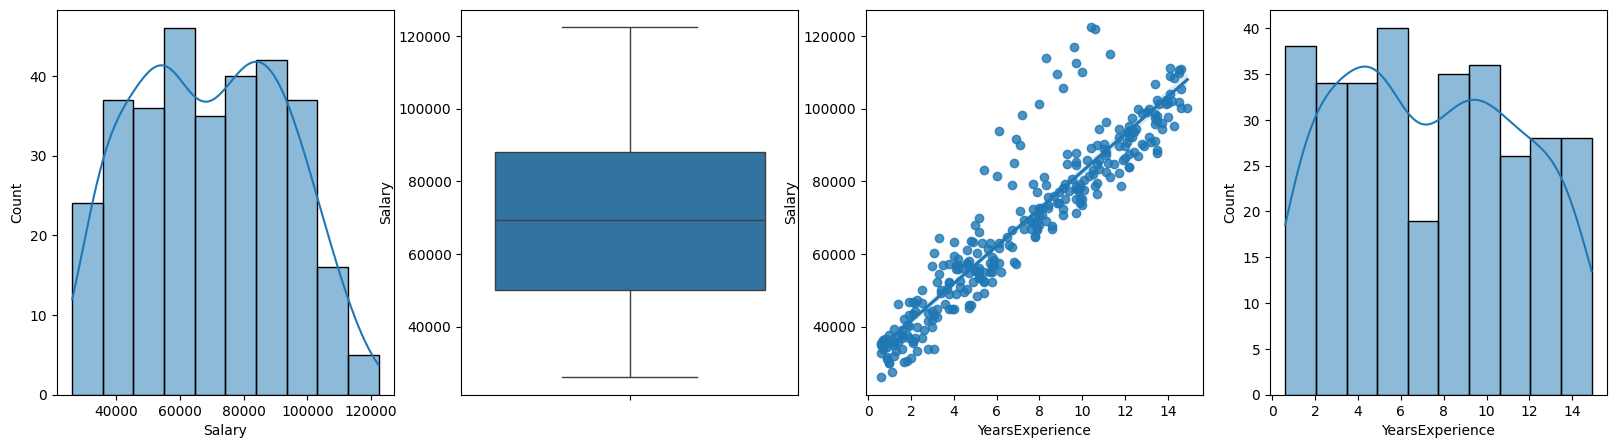

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.histplot(salary['Salary'], kde=True, ax=ax[0])
sns.boxplot(y=salary['Salary'], ax=ax[1])
sns.regplot(x='YearsExperience', y='Salary', data=salary, ax=ax[2])
sns.histplot(salary['YearsExperience'], kde=True, ax=ax[3])
plt.show()

In [30]:
# Salary Statistics
mean_salary = salary['Salary'].mean()
median_salary = salary['Salary'].median()

# Years of Experience Statistics
mean_experience = salary['YearsExperience'].mean()
median_experience = salary['YearsExperience'].median()

# Correlation
correlation = salary['Salary'].corr(salary['YearsExperience'])

# Enhanced Print Output
print("Salary Statistics:")
print(f"  Average Salary: ${mean_salary:.2f}")
print(f"  Median Salary: ${median_salary:.2f}")
print("\nYears of Experience Statistics:")
print(f"  Average Years of Experience: {mean_experience:.2f}")
print(f"  Median Years of Experience: {median_experience:.2f}")
print(f"\nCorrelation between Salary and Years of Experience: {correlation:.2f}")

Salary Statistics:
  Average Salary: $69383.72
  Median Salary: $69314.95

Years of Experience Statistics:
  Average Years of Experience: 7.33
  Median Years of Experience: 7.30

Correlation between Salary and Years of Experience: 0.92


In [31]:
salary[salary['YearsExperience'].isnull()]

,YearsExperience,Salary
32,NaN,61000.00
37,NaN,102000.00
41,NaN,98242.00
45,NaN,44932.27
48,NaN,72037.40
51,NaN,107328.78
83,NaN,100810.52
121,NaN,81567.55
132,NaN,82469.91
155,NaN,88462.68


In [32]:
salary[salary['Salary'].isnull()]

,YearsExperience,Salary
31,4.0,NaN
36,8.5,NaN
40,5.9,NaN
60,9.4,NaN
61,2.5,NaN
67,8.0,NaN
70,9.3,NaN
89,3.2,NaN
97,3.3,NaN
109,14.8,NaN


In [33]:
#drop row if values in both columns are NaN

salary.dropna(subset=['YearsExperience', 'Salary'], how='all', inplace=True)
salary.isnull().sum()

,0
YearsExperience,21
Salary,21


In [34]:
def imputing_salaries(exp_years):
  if exp_years <= 2:
    return 40000
  elif exp_years > 2 and exp_years <= 6:
    return 40000 + (exp_years - 4) * 10000
  elif exp_years > 6 and exp_years <= 10:
    return 40000 + (exp_years - 6) * 10000
  else: return 100000 + (exp_years/10)* np.random.rand() * 10000

def imputing_exp(salary_value):
  if salary_value <= 50000:
    return 1 + np.random.rand()
  elif salary_value > 50000 and salary_value <= 100000:
    return 2 + np.random.rand()*np.random.randint(1,9)
  elif salary_value > 100000:
    return 10 + 4*np.random.rand()

In [35]:
salary['Salary'] = salary['Salary'].fillna(salary['YearsExperience'].apply(imputing_salaries))
salary['YearsExperience'] = salary['YearsExperience'].fillna(salary['Salary'].apply(imputing_exp))

In [36]:
salary.isnull().sum()

,0
YearsExperience,0
Salary,0


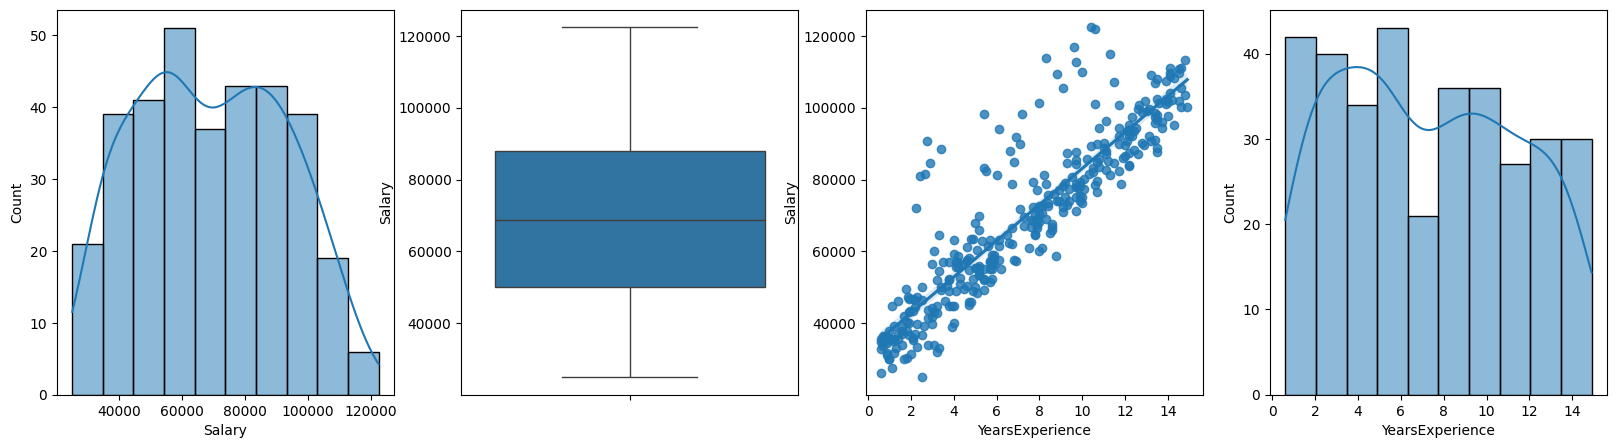

In [37]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
sns.histplot(salary['Salary'], kde=True, ax=ax[0])
sns.boxplot(y=salary['Salary'], ax=ax[1])
sns.regplot(x='YearsExperience', y='Salary', data=salary, ax=ax[2])
sns.histplot(salary['YearsExperience'], kde=True, ax=ax[3])
plt.show()

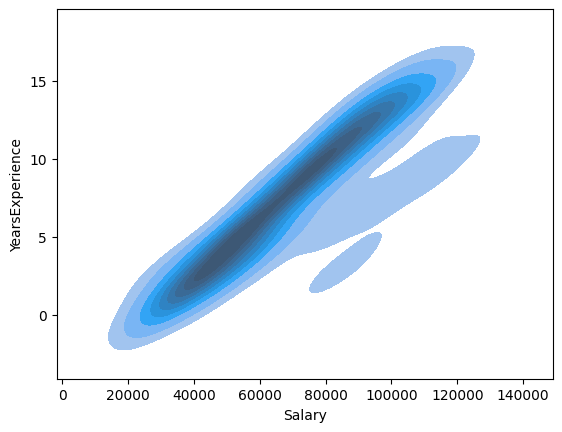

In [38]:
sns.kdeplot(data=salary, x='Salary', y='YearsExperience', fill=True)
plt.show()

In [39]:
salary.describe()

,YearsExperience,Salary
count,339.000000,339.000000
mean,7.252151,69274.600535
std,4.152140,23450.594876
min,0.600000,25000.000000
25%,3.750000,50025.925000
50%,7.100000,68751.970000
75%,10.700000,88071.650000
max,14.900000,122392.000000


In [40]:
salary['LogSalary'] = np.log(salary['Salary'])
salary

,YearsExperience,Salary,LogSalary
0,1.200000,39344.00,10.580099
1,1.400000,46206.00,10.740865
2,1.600000,37732.00,10.538264
3,2.100000,43526.00,10.681114
4,2.300000,39892.00,10.593931
...,...,...,...
335,8.100000,70740.42,11.166772
336,11.700000,89798.61,11.405325
337,1.951456,43478.42,10.680020
338,9.500000,80692.96,11.298407


# Regression Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [42]:
X = salary[['YearsExperience']]                 #Feature
y = salary['LogSalary']                         #Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [53]:
predictions = lr.predict(X_test)

In [54]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": predictions})

predictions

,Actual,Predicted
105,11.205537,11.171020
155,11.390336,10.771838
95,11.537048,11.608843
287,11.590792,11.577315
152,11.489092,11.616804
...,...,...
255,10.709977,10.812801
51,11.583652,11.611055
131,11.455952,11.362070
192,10.576543,10.709316


In [55]:
r2 = r2_score(y_test, predictions['Predicted'])
print(r2)

0.7770843061441286


In [56]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions['Predicted'])
print(mae)

0.1298099079805419


In [59]:
import warnings
warnings.filterwarnings("ignore")


predictions_test = lr.predict([[1], [1.5], [7], [7.8], [8.3]])
print(np.exp(predictions_test))

[39416.87339759 41017.38784451 63549.49358901 67728.18181723
 70478.27141384]
